In the presence of outliers, an alternative to the mean square loss is the Huber loss w.r.t. the residual $r=y-X\beta$ defined as follows
$$
\text{Huber}(r;M)=\left\{
\begin{aligned}
&r^2, &|r|<M \\
&2M|r|-M^2, &|r|\geq M .\\
\end{aligned}
\right.
$$
Here, we show an example to perform a Huber regression with ``scope``.

In [5]:
import numpy as np
import jax.numpy as jnp
import matplotlib.pyplot as plt
import seaborn as sns
from scope import ScopeSolver

import warnings
warnings.filterwarnings('ignore')

In [6]:
n, p = 500, 100
rng = np.random.default_rng(0)
X = rng.normal(0, 1, (n, p))
beta = np.zeros(p)
beta[:3] = [1, 2, 3]
y = X @ beta + rng.normal(0, 1, n)

# make outliers via flipping the sign of 20% response
fliplist = rng.random(len(y))
for i in range(len(y)):
    if fliplist[i] < 0.2:
        y[i] = - y[i]

In [7]:
def huber_loss(params):
    return jnp.mean(jnp.abs(y - jnp.matmul(X, params)))

solver = ScopeSolver(p, sparsity=3)
params = solver.solve(huber_loss)
print('LAD Error: ', np.sum((params-beta)**2).round(3))

LAD Error:  0.133


In [8]:
def ols_loss(params):
    loss = jnp.mean((y - X @ params)**2)
    return loss

solver = ScopeSolver(p, sparsity=3)
params_ols = solver.solve(ols_loss)
print('Suqare-Loss Error: ', np.sum((params_ols-beta)**2).round(3))

Suqare-Loss Error:  2.92


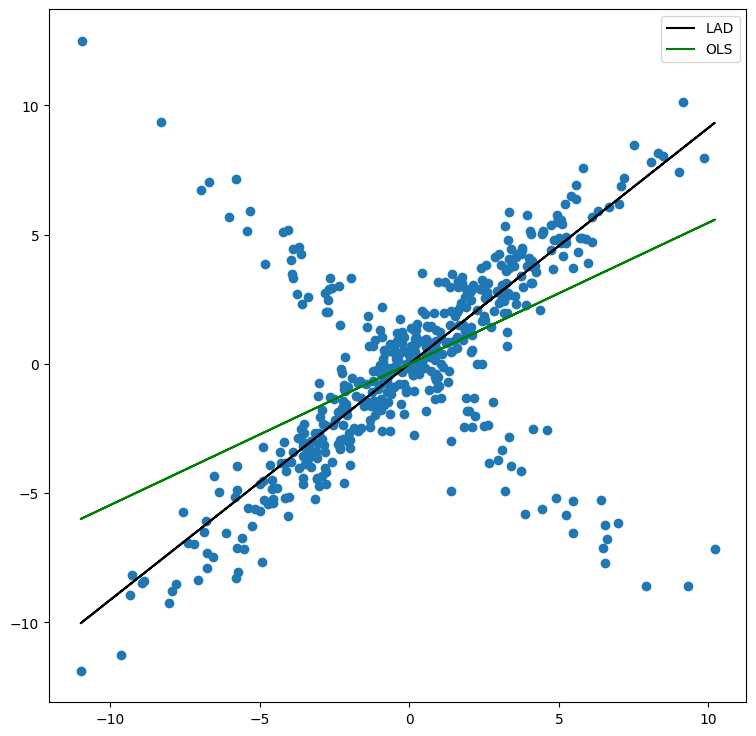

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (9, 9))
b, a = np.polyfit(X @ beta, X @ params, deg=1)
b_ols, a_ols = np.polyfit(X @ beta, X @ params_ols, deg=1)
ax.scatter(X @ beta, y)
ax.plot(X @ beta, a + b * (X @ beta), color="k", lw=1.5, label='LAD')
ax.plot(X @ beta, a_ols + b_ols * (X @ beta), color="g", lw=1.5, label='OLS')
ax.legend()